# 10. 베이지안 모델 비교 & 라플라스 근사 (Bayesian model Comparison, Laplace Approximation)
- 많은 추론 문제에서는 미리 하나의 모델만이 정해져 있는 것이 아니라, 여러 가지 가능한 모델들을 고려 가능

- 베이지안 추론은 상위 수준에서 모델 $M_1, M_2$ 등을 비교하는 데 적용 가능

    베이즈 정리에 따라
    
$$p(\mathcal{M}_i | \mathcal{D}) = \frac{p(\mathcal{D} | \mathcal{M}_i) p(\mathcal{M}_i)}{\sum_i p(\mathcal{D} | \mathcal{M}_i) p(\mathcal{M}_i)}$$로 나타낼 수 있으며, 이는 Marginal 가능도 $p(D|M_i)$에 의존

- Marginal Likelihood는 다음과 같이 정의

$$p(\mathcal{D} | \mathcal{M}_i) = \int_\Theta p(\mathcal{D} | \theta, \mathcal{M}_i) p(\theta | \mathcal{M}_i) \mathrm{d}\theta.$$

- Marginal 가능도는 모델 $M_i$가 관측값 $D$에 잘 적합되는지를 측정

<br>

## 11-01. 모델 비교와 베이즈 요인 (Bayes Factors)
- 베이즈 정리:

$$p(\mathcal{M}_i | \mathcal{D}) = \frac{p(\mathcal{D} | \mathcal{M}_i) p(\mathcal{M}_i)}{\sum_i p(\mathcal{D} | \mathcal{M}_i) p(\mathcal{M}_i)}.$$

- 모델 $M_1$과 $M_2$에 대해 $p(M_1)=p(M_2)$라고 가정하면, 
    
    **두 모델의 사후분포 비율은 주변 가능도의 비율로 주어지며, 이것이 베이즈 요인 (Bayes Factor)**
    
    즉, 
    
$$B_{12} = \frac{p(\mathcal{M}_1 | \mathcal{D})}{p(\mathcal{M}_2 | \mathcal{D})} = \frac{p(\mathcal{D} | \mathcal{M}_1)}{p(\mathcal{D} | \mathcal{M}_2)}$$


- 베이즈 요인의 강도 해석

<table>
<thead>
<tr class="header">
<th><span class="math inline">\(\log B_{12}\)</span></th>
<th>강도</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>$\text{0 to 1}$</td>
<td>관측값 $D$가 모델 $M_1$보다 $M_2$에 더 적합하다는 증거 X</td>
</tr>
<tr class="even">
<td>$\text{1 to 3}$</td>
<td>관측값 $D$가 모델 $M_2$보다 $M_1$에 더 적합하다는 증거</td>
</tr>
<tr class="odd">
<td>$\text{3 to 5}$</td>
<td>관측값 $D$가 모델 $M_2$보다 $M_1$에 더 적합하다는 강한 증거</td>
</tr>
<tr class="even">
<td>$\text{ >5}$</td>
<td>관측값 $D$가 모델 $M_2$보다 $M_1$에 더 적합하다는 매우 강한 증거</td>
</tr>
</tbody>
</table>


<br>

### 01. 유의 사항
- Marginal 가능도는 사전 분포에 대한 적분으로 계산되기 때문에 사전 분포에 매우 민감
    - 예) 어떤 매개변수의 사전 표준편차를 10배 곱하여 파라미터 공간의 범위를 10배 확장하면, 
        
        사후분포나 사후예측의 변화는 미미할 수 있으나 Marginal 가능도는 10배 변화할 수 있습니다.

- 이러한 단점에도 불구하고, Marginal 가능도는 서로 다른 모델을 비교하는 데 널리 사용되는 방법

<br>

## 11-02. 라플라스 근사 (Laplace Approximation)
- Laplace 근사는 사후 분포를 가우시안으로 근사하는 또 다른 일반적인 방법을 제공
- 이 아이디어는 관심 있는 함수 $f(\theta)$의 적분 값을 근사할 때, 함수가 최대가 되는 지점$\hat{\theta}$ 근처에서, 함수의 형태를 정규분포를 사용하여 근사

- **즉, $\hat{\theta}$에서 함수 $f(\theta)$가 가장 큰 값을 가지며, 이 지점 주변을 잘 맞는 가우시안 분포(정규분포)를 찾아내고, 그 가우시안의 넓이를 계산하여 적분 값을 근사하는 것**
    - 최대점에서의 근사:
        
        - 함수 $f(\theta)$의 로그값 $\text{log} f(\theta)$를 최대점 $\hat{\theta}$근처에서 2차 테일러 전개
        
            $log f(\theta) \approx log f(\hat{\theta}) - \frac{1}{2}(\theta-\hat{\theta})^T H(\theta-\hat{\theta})$
            
            ($H$는 $log f(\theta)$의 헤시안 행렬)
            
        - 가우시안 형태로 변환:
            - 지수 함수를 취해서
            
                $f(\theta) \approx f(\hat{\theta}) exp[- \frac{1}{2}(\theta - \hat{\theta})^T H(\theta - \hat{\theta})]$
                
                위 식은 $\theta$가 $\hat{\theta}$ 주변에서 다변량 정규분포의 형태를 가짐
                
                여기서 정규분포의 평균은 $\hat{\theta}$, 공분산 행렬은 $H^{-1}$로 결정
    
    <br>
    
    - **주변을 잘 맞는 가우시안 분포는 함수 $f(\theta)$가 최대점 근처에서, 가우시안 분포로 아주 잘 근사 될 수 있음을 의미**

- 이 때, 가우시안의 분산(공분산 행렬)은 $\hat{\theta}$에서 $log f(\theta)$의 2차 테일러 전개에 의해 결정

- 만약 $f(\theta)=p(D, \theta)$와 같이 사후분포의 비정규화된 형태를 가지고 있다면,
    
    라플라스 근사법을 이용해 사후분포의 정규화 상수, 즉 Marginal 가능도를 계산할 수 있음

- 이 방법은 최대 사후 확률 (MAP) 추정치 근처를 중심으로 가우시안 분포로 사후분포를 근사하는 방식으로도 사용
    
    - **일정한 조건에서는 관측값이 충분히 많아지면 사후분포가 점점 정규분포 형태에 가까워지므로, 이 접근법이 정당화**

<br>

- 라플라스 근사법은 계산이 단순하며, 만약 실제 사후분포가 거의 정규분포와 같다면 높은 성능의 근사치를 얻을 수 잇음
- 하지만, 이 방법은 분포가 단봉분포일 때만 적절히 작동하며, 모수가 어떤 방식으로 매개변수화되었는지에 민감

- 실제로 대부분의 질량이 봉우리와 멀리 떨어진 곳에 있을 경우, 근사가 제대로 되지 않을 수 있으며,
    
    결국 라플라스 근사법은 MAP 추정과 비슷한 한계점을 가짐
    
    - 만약 계산된 봉우리가 실제로 낮은 확률 영역에 있다면, 이후에 분산을 제대로 추정해도 그 결과는 의미가 없음
    
    

<br>

## 11-03. Marginal Likelihood 계산
- 단변량 분포 $p(\theta) = \frac{p^*(\theta)}{Z}$의 정규화 상수를 계산하기 위하여 라플라스 근사를 적용하려면
    
    봉우리(최대점) 지점 $\hat{\theta}$에서 $log p^*(\theta)$의 2차 테일러 근사를 이용
    
    $\log p^*(\theta) \approx \log p^*(\widehat{\theta}) - \frac{c}{2} (\theta - \widehat{\theta})^2,$
 
    $\rightarrow$ **여기서 최대점 $\hat{\theta}$에서는 도함수의 값이 0이므로 1차항은 사라짐, 또한 상수항 $c$는**
    
    $c = - \frac{\,\mathrm{d}^2}{\,\mathrm{d} \theta^2} \log p^*(\theta) \bigg\rvert_{\theta = \widehat{\theta}}.$로 정의

    $\rightarrow$ **근사를 통해 정규화 상수 $Z$는: $Z \approx p^*(\widehat{\theta}) \sqrt{\frac{2\pi}{c}}.$**
    
<br>

- $K$차원 다변량의 경우 근사식은
    
    $\log p^*(\theta) \approx \log p^*(\widehat{\theta}) - \frac{1}{2} (\theta - \widehat{\theta})^T \mathbf{A} (\theta - \widehat{\theta}),$로 주어지며, 
  
  $A$의 원소는: $A_{ij} = - \frac{\partial^2}{\partial \theta_i \partial \theta_j} \log p^*(\theta) \bigg\rvert_{\theta = \widehat{\theta}}$로, 이는 **최대점 $\hat{\theta}$에서 $log p^*(\theta)$의 음의 해시안 행렬**
  
  $\rightarrow$ 따라서 다변량 분포의 정규화 상수는
  
  $Z \approx p^*(\widehat{\theta}) \sqrt{\frac{(2\pi)^K}{\det \mathbf{A}}}.$로 근사됨

<br>

#### 이와 같이 라플라스 근사는 최대점 근처에서 함수의 로그값을 2차 테일러 전개하여, 
#### 복잡한 분포를 가우시안 형태로 근사하고, 그 가우시안의 정규화 상수를 계산함으로써 전체 정규화 상수를 근사하는 방법

<br>

## 11-04. 라플라스 근사 예제
- 분산이  $\sigma^2$인 정규분포를 따르는 데이터  $D=(x_1,…,x_n)$의 평균 $\mu$에 대한 베이지안 추론

In [1]:
import autograd
import autograd.numpy as np
import autograd.numpy.random as npr
import scipy.optimize

- $x$에 대해, 평균 $\mu$와 표준편차 $\sigma$를 갖는 정규분포의 로그 확률 밀도함수

$$log p(x|\mu, \sigma)= -0.5 log (2\pi) - log(\sigma) - \frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}$$를 각 $x$에 대해 계산한 후, 모든 값들을 합산

In [2]:
def lnormpdf(x, mu, sigma):
    return np.sum(-0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2)

- $\mu = 0.5$에 대한 표준정규분포 데이터 샘플 100개

In [3]:
npr.seed(42)
n = 100
data = 0.5 + npr.normal(size=n)

- 사전분포 & 가능도 설정

In [14]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0

"""로그 가능도"""
likelihood = lambda mu: lnormpdf(data, mu, sigma_x)

"""로그 사전분포"""
prior = lambda mu: lnormpdf(mu, mu0, sigma0)

- 전체 로그 가능도 (가능도와 로그 사전분포 값을 합산)

In [18]:
def llikelihood(theta):
    return likelihood(theta) + prior(theta)

- 최적화 목표 함수

In [19]:
def ltarget(theta):
    return -llikelihood(theta)

- 목표함수의 기울기 & 헤시안

In [20]:
dltarget = autograd.grad(ltarget)
d2ltarget = autograd.hessian(ltarget)

- 최적화

In [21]:
theta_opt = scipy.optimize.minimize(ltarget, np.ones(1), method='L-BFGS-B', jac = dltarget)
print('posterior mode:', theta_opt.x[0])

posterior mode: 0.3957138006052337


- 최적화 결과 (사후분포의 봉우리 지점)

In [23]:
x0 = theta_opt.x[0]

- 라플라스 근사를 통한 정규화 상수 $Z$ 근삿값

$$Z \approx p^* (x_0) \sqrt{\frac{2\pi}{c}}$$

$$log Z \approx log p^*(x_0) + \frac{1}{2}log(2\pi) - \frac{1}{2}log(c)$$

In [24]:
logZ = llikelihood(x0) + 0.5*np.log(2*np.pi) - 0.5*np.log(np.abs(d2ltarget(x0)))
print("logZ =", logZ)

logZ = -136.1304247617546


<br>

#### `PyTorch` 사용

In [25]:
import torch
import math
import numpy as np
import numpy.random as npr

In [26]:
torch.set_default_dtype(torch.double)

In [ ]:
def lnormpdf(x, mu, sigma):
    return torch.distributions.normal.Normal(loc=mu, scale=sigma).log_prob(x).sum()

In [27]:
npr.seed(42)
n = 100
numpydata = 0.5 + npr.normal(size=n)
data = torch.tensor(numpydata)

In [28]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0
likelihood = lambda mu: lnormpdf(data, mu, sigma_x)
prior = lambda mu: lnormpdf(mu, mu0, sigma0)

In [29]:
def llikelihood(theta):
    return likelihood(theta) + prior(theta)
 
def ltarget(theta):
    # note: need to define minimisation separately
    return -llikelihood(theta)

In [34]:
theta = torch.zeros(1, requires_grad=True)
optimizer = torch.optim.LBFGS([theta])

In [38]:
tol = 1e-6
l_old = math.inf
l_new = ltarget(theta)

while l_old - l_new > tol:
    l_old = l_new
    def closure():
        optimizer.zero_grad()
        l = ltarget(theta)
        l.backward()
        return l
    optimizer.step(closure)
    l_new = ltarget(theta)
    
print('posterior mode:', theta[0].item())

posterior mode: 0.39571380060523365


In [39]:
ll = llikelihood(theta)

In [41]:
def hessian(f, wrt):
    g1 = torch.autograd.grad(f, wrt, create_graph=True)[0]
    f1 = g1.sum()
    return torch.autograd.grad(f1, wrt)[0]
 
print(hessian(ll, theta))

logZ = llikelihood(theta) + 0.5*math.log(2*math.pi) - 0.5*torch.log(torch.abs(hessian(ll, theta)))
print("logZ =", logZ.item())

tensor([-100.1111])
logZ = -136.1304247617546


<br>

## 11-05. 열역학적 통합 (thermodynamic integration)을 이용한 MCMC 기반 가능도
- MCMC를 사용하여 Marginal Likelihood는 평가하는 것은 간단하지 않음
- Marginal Likelihood는 사전 분포에 대한 적분으로 표현되는데, 일반적으로 전체 공간 중 아주 작은 부분에 의해 지배되기 때문에, 
    
    사전 분포로부터 샘플링하여 이를 평가하면 결과의 분산이 매우 커짐

    - 중요도 샘플링을 이용하여 주변 우도를 추정하는 방법으로 소위 조화 평균(harmonic mean) 추정기를 구성할 수도 있지만, 실제로는 매우 신뢰할 수 없으므로 절대 사용해서는 안 됨

<br>

- 어닐링(Annealing) 개념은 열역학적 통합(thermodynamic integration)이라는 방법을 사용하여 Marginal Likelihood를 계산하는 데에도 사용할 수 있음

- 열역학적 통합은 $\beta \in [0, 1]$ 범위에서 다음과 같이 정의된 분포로부터 샘플을 추출하는 방식으로 작동

$$\pi^*_\beta(\theta) = p(\mathcal{D} | \theta)^\beta p(\theta)$$

- 여기서 $Z_\beta = \int_{\Theta} \pi^{*}_{\beta} (\theta) d \theta$라고 하면, Marginal Likelihood는 $p(D)=Z_1$이고,
    
    $Z_0 = \int_{\Theta} p(\theta) d \theta = 1$
    
    또한, 정규화된 분포는 $\pi_\beta (\theta) = \frac{\pi^{*}_\beta (\theta)}{Z_\beta}$로 정의

<br>

- 열역학적 통합은 수치적분에 기반하며, 다음과 같이 표현

    $\ln Z_1 - \ln Z_0 = \int\limits_0^1 \frac{\partial \ln Z_\beta}{\partial \beta} \,\mathrm{d} \beta.$

    필요한 적분함수를 다음과 같이 정의
$$\begin{align*}
\frac{\partial \ln Z_\beta}{\partial \beta} = \frac{1}{Z_\beta} \frac{\partial Z_\beta}{\partial \beta} = \frac{1}{Z_\beta} \frac{\partial}{\partial \beta} \int_{\Theta} \pi^*_\beta(\theta) \,\mathrm{d} \theta  = \frac{1}{Z_\beta} \int_{\Theta} \frac{\partial \pi^*_\beta(\theta)}{\partial \beta} \,\mathrm{d} \theta
\end{align*}$$이를 다시 정규화된 분포를 사용하여 정의하면$$\begin{align*}
\int_{\Theta} \frac{1}{\pi^*_\beta(\theta)} \frac{\partial \pi^*_\beta(\theta)}{\partial \beta} \frac{\pi^*_\beta(\theta)}{Z_\beta} \,\mathrm{d} \theta = \int_{\Theta} \frac{\partial \ln \pi^*_\beta(\theta)}{\partial \beta} \pi_\beta(\theta) \,\mathrm{d} \theta.
\end{align*}$$

(로그 미분법칙에 따라 $\frac {\partial \ln \pi^{*}_\beta (\theta)}{\partial \beta} = \frac{1}{\pi^{*}_\beta (\theta)} \frac{\partial \pi^{*}_\beta (\theta)}{\partial \beta}$)

여기서 $ln\;\pi^{*}_\beta (\theta)= \beta \ln p(\mathcal{D} | \theta) + \ln p(\theta),$

즉, 적분은 정규화된 분포 $\pi_\beta (\theta)$에 대한 기대값으로 해석할 수 있으며, 이를 이용해 로그 Marginal Likelihood를 다음과 같이 계산할 수 있음$$\ln p(\mathcal{D}) = \ln Z_1 - \ln Z_0 = \int_0^1 \mathrm{E}_\beta [\ln p(\mathcal{D} | \theta)] \,\mathrm{d}\beta,$$

여기서 $E_\beta [\cdot]$은 어닐링된 사후분포 $\pi_\beta (\theta)$에 대한 기대값을 의미하며, 해당 체인으로부터 얻은 몬테카를로 샘플들을 사용하여 평가할 수 있음

<br>

## 10-06. 열역학적 통합 예제
- 분산이  $\sigma^2$인 정규분포를 따르는 데이터  $D=(x_1,…,x_n)$의 평균 $\mu$에 대한 베이지안 추론

In [46]:
import scipy.integrate
import matplotlib.pyplot as plt

In [50]:
def mhsample1(theta0, n, logtarget, drawproposal):
    theta = theta0
    thetas = np.zeros(n)
    accepts = 0
    
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
            
        thetas[i] = theta
        
    print("Sampler acceptance rate:", accepts/n)
    return thetas

In [ ]:
def lnormpdf(x, mu, sigma):
    return np.sum(-0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2)

In [51]:
npr.seed(42)
n = 100
data = 0.5 + npr.normal(size=n)

In [53]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0

likelihood = lambda mu: lnormpdf(data, mu, sigma_x)
prior = lambda mu: lnormpdf(mu, mu0, sigma0)

In [54]:
CHAINS = 20
ITERS = 10000
betas = np.concatenate((np.array([0.0]), np.logspace(-5, 0, CHAINS)))

In [44]:
xx = np.zeros((ITERS, CHAINS+1))
for i in range(CHAINS+1):
    xx[:,i] = mhsample1(np.zeros(1), ITERS, lambda x: betas[i]*likelihood(x)+prior(x),
                        lambda x: x + 0.2/np.sqrt(betas[i]+1e-3)*npr.normal(size=1))

C:\Users\user\AppData\Local\Temp\ipykernel_58760\1604245064.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thetas[i] = theta


Sampler acceptance rate: 0.492
Sampler acceptance rate: 0.4794
Sampler acceptance rate: 0.4867
Sampler acceptance rate: 0.4808
Sampler acceptance rate: 0.4816
Sampler acceptance rate: 0.4819
Sampler acceptance rate: 0.4891
Sampler acceptance rate: 0.4903
Sampler acceptance rate: 0.4849
Sampler acceptance rate: 0.4908
Sampler acceptance rate: 0.4958
Sampler acceptance rate: 0.4887
Sampler acceptance rate: 0.4917
Sampler acceptance rate: 0.4935
Sampler acceptance rate: 0.5009
Sampler acceptance rate: 0.4897
Sampler acceptance rate: 0.498
Sampler acceptance rate: 0.4979
Sampler acceptance rate: 0.5053
Sampler acceptance rate: 0.4946
Sampler acceptance rate: 0.4967


In [55]:
lls_ti = np.zeros(xx.shape)
for i in range(lls_ti.shape[0]):
    for j in range(lls_ti.shape[1]):
        lls_ti[i,j] = likelihood(xx[i,j])

ll = np.mean(lls_ti, 0)

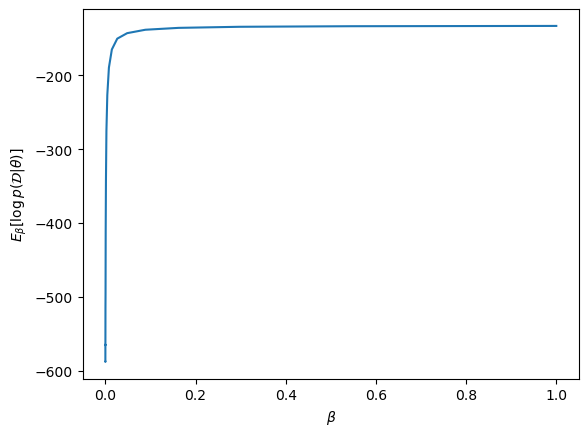

In [56]:
plt.plot(betas, ll)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$E_\beta[ \log p(\mathcal{D} | \theta)]$')
plt.show()

In [57]:
print('Marginal likelihood:',scipy.integrate.simpson(ll, betas))

Marginal likelihood: -136.07312581322287


- 열역학접 통합과 병렬 템퍼링은 모두 동일한 온도 분포 $\pi_\beta{\theta}$를 시뮬레이션해야 하므로, 이 두 방법은 결합 가능